# <center> Supervised learning for classification in Marketing and Sales </center>

# Goals:
In this project, we will develop and apply different supervised classification tecnhiques. These methodologies are broadly used in business to multiple use cases as:
- identify **new customers** in the market
- identify customers in our internal Data Warehouse with **more likely** to buy a new product
- identify unsatisfied customers and thus, likely to be **churners**
- classify text into categories for spam identification or to process messages or emails from our customers

During this project we will follow the end-to-end Machine Learning process: from data gathering and cleaning, exploratory data analysis, feature engineering and finally, training and prediction. In particular, the main sections of this project are:
1. Data understanding and preparation: exploration of the dataset and feature engineering (missing values, outlier identification, categorical variables management) 
2. Model Training: training the baseline SVM and Decision Trees. Analysis of metrics (recall, precision, confusion metrics) and improvement the classification through several techniques as undersampling to balance or ensemble of models
3. Creating a Business opportunity with Machine Learning: selection of the best model and identification of the most important features



We will apply all these techniques to identify new customers to capture and improve sales in a **marketing use case**.

*******

# 0. Context:  Using Machine Learning to increase our customers base

We work as a head of data science and AI in a new Internet of Things (IoT) company. Our company designs, builds and implements wireless IoT products.

Our marketing colleagues are planning to launch a new commercial campaign for capturing new customers. We have to decide which companies are the target to be visited by our sales managers. As the cost to send a sales manager to visit a potential customer is quite high, we have to select from the total market base, those companies that are more likely to buy any of our products and become a new customer. 

To support this new campaign, we are **using several of the most important classification techniques**. We will manage key evaluation aspects of a classification as **recall, precision, false positive, etc...** to decide which are the best potential customers. 


## 0.1 Dataset

In this practice we are using a new dataset named `market_dt.csv`. This file contains information of **IoT market**, i.e. companies that could be interested to buy IoT products or they have already. In particular, the detailed information for each customer is:
- *City*: Name of the city where the company is located
- *Customer_Flag*: It is a flag that is 1 for current customers and 0 for non-customers
- *Revenue*: The annual incomes of the company
- *Sector*: It's an integer that identifies the sector of the company's activity
- *CNT_EMPLOYEE*: Number of employees of the company
- *CNT_CB_DENSITY*: Number of companies close
- *CNT_CB_MOB_DENSITY*: Number of companies with mobile services
- *CNT_CB_FN_DENSITY*: Number of companies with fixed services
- *Legal_Form_Code*: It's an integer that identifies the legal type of the company: big, small or medium company
- *Mobile potential*: It's an estimation of the total annual expense that a company can do in telco services, including IoT

## 0.2. Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import iqr
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_curve, classification_report, confusion_matrix, precision_score, recall_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [9]:
#from google.colab import drive
#drive.mount('/content/drive')

# 1. Data understanding and preparation

The first stage in any Machine Learning project is to have a clear understanding of the dataset from a statistical point of view but also from the perspective of the value of their variables to solve the use case or problem. To achieve this goal we need to "clean" and "transform" the data. All this process is known as **Data Wrangling**. In particular, the whole data wrangling process implies:
- Define and apply an strategy for nulls and coding for categorical variables
- Analyze the variables distribution and correlation between them
- Remove outliers
- etc....


Let's open the csv with separator ";" and assign to a dataframe variable (use read_csv from Pandas library). Let's see the top 5 elements.

In [10]:
market_dt = pd.read_csv('data/market_dt.csv', usecols={'City', 'Customer_Flag', 'Revenue', 'Sector', 'CNT_EMPLOYEE',
                                                 'CNT_CB_DENSITY', 'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY',
                                                 'Legal_Form_Code','Mobile_potential'}, sep=";")
market_dt.head()

,City,Customer_Flag,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential
0,Bremen,0,21339309.0,26.0,14.0,25,161.0,154.0,10.0,1783.999887
1,Steinfurt,0,NaN,74.0,4.0,50,41.0,41.0,1.0,1884.468150
2,Magdeburg,0,NaN,83.0,28.0,28,188.0,187.0,6.0,1938.651093
3,Leipzig,0,NaN,61.0,28.0,12,597.0,594.0,21.0,1602.187431
4,Tamm,0,NaN,74.0,4.0,37,336.0,334.0,10.0,1931.884908


[**EX1**] [**REPORT**] Let's identify the type of the variables (integer, float, chart...) and the size of the dataset and the file. Which are the variable with more nulls? And with no nulls? Why 'City' variables is considered as object type?

Tip: [.info()](https://www.geeksforgeeks.org/python-pandas-dataframe-info/) is a function that reports the main characteristics of a dataframe.

In [11]:
print(market_dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13335 entries, 0 to 13334
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                13335 non-null  object 
 1   Customer_Flag       13335 non-null  int64  
 2   Revenue             8589 non-null   float64
 3   Sector              13235 non-null  float64
 4   Legal_Form_Code     13229 non-null  float64
 5   CNT_EMPLOYEE        13335 non-null  int64  
 6   CNT_CB_DENSITY      10265 non-null  float64
 7   CNT_CB_MOB_DENSITY  10265 non-null  float64
 8   CNT_CB_FN_DENSITY   10265 non-null  float64
 9   Mobile_potential    13335 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 1.0+ MB
None


Once we have the first contact with the dataset, next step is to decide the strategy to apply to **nulls** values. There are several options as removing the rows with any **null**, assigning a constant value (e.g. median or mean value), etc.... In our case, we are removing the rows with **null** in any of the values.

[**EX2**] [**CODE**] Eliminate those rows which has nulls in any variable. Let's check that there is no nulls in any variable. Which is the size of the resulting dataset? 

In [12]:
market_dt = market_dt.dropna(axis=0, how="any")

In [13]:
market_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6987 entries, 0 to 13321
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                6987 non-null   object 
 1   Customer_Flag       6987 non-null   int64  
 2   Revenue             6987 non-null   float64
 3   Sector              6987 non-null   float64
 4   Legal_Form_Code     6987 non-null   float64
 5   CNT_EMPLOYEE        6987 non-null   int64  
 6   CNT_CB_DENSITY      6987 non-null   float64
 7   CNT_CB_MOB_DENSITY  6987 non-null   float64
 8   CNT_CB_FN_DENSITY   6987 non-null   float64
 9   Mobile_potential    6987 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 600.4+ KB


Your output should look like this:

In [14]:
market_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6987 entries, 0 to 13321
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                6987 non-null   object 
 1   Customer_Flag       6987 non-null   int64  
 2   Revenue             6987 non-null   float64
 3   Sector              6987 non-null   float64
 4   Legal_Form_Code     6987 non-null   float64
 5   CNT_EMPLOYEE        6987 non-null   int64  
 6   CNT_CB_DENSITY      6987 non-null   float64
 7   CNT_CB_MOB_DENSITY  6987 non-null   float64
 8   CNT_CB_FN_DENSITY   6987 non-null   float64
 9   Mobile_potential    6987 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 600.4+ KB


In Machine Learning, it is key to analyze the variables from a statistical point of view: knowing the distribution of each variable, their mean and median are key to identify any transformation to apply before training the model. 
Furthermore, due to we are training a classifier (in our case, to classify between ***customers*** and ***non customers***), this analysis should be done for both classes separetly.

[**EX3**] [**REPORT**] Create a `customer_dt`and `noncustomer_dt`datasets based on the `Customer_Flag`variable (`Customer_Flag`=1 for **customers** and 0 for **noncustomers**). Build a boxplot for the `Revenue`, `CNT_EMPLOYEE`, `Mobile_potential` and `CNT_CB_Density` numeric variables for both datasets. Which are the main differences between `customer_dt`and `noncustomer_dt` datasets comparing these variables. Which is the dataset with `CNT_EMPLOYEE` higher? Which datasets have more outliers in `Revenues`? Which is the Q1, median (=Q2) and Q3 for `Revenues`and `Mobile_potential`?


Tip: you may have to use the [boxplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) function.

In [15]:
customer_dt = market_dt[market_dt['Customer_Flag'] == 1]
customer_dt.head()

,City,Customer_Flag,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential
11548,Haar,1,4000000.0,42.0,14.0,13,891.0,867.0,62.0,1778.004205
11551,Greding,1,11780000.0,74.0,4.0,50,7.0,7.0,0.0,1899.663564
11553,Dörth,1,2050000.0,43.0,14.0,16,30.0,30.0,1.0,1655.520125
11554,Frankfurt,1,853500.0,63.0,14.0,13,870.0,842.0,77.0,1548.507315
11565,Benningen,1,10680000.0,74.0,4.0,16,319.0,317.0,10.0,1746.128813


In [16]:
customer_dt.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 11548 to 13321
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                1111 non-null   object 
 1   Customer_Flag       1111 non-null   int64  
 2   Revenue             1111 non-null   float64
 3   Sector              1111 non-null   float64
 4   Legal_Form_Code     1111 non-null   float64
 5   CNT_EMPLOYEE        1111 non-null   int64  
 6   CNT_CB_DENSITY      1111 non-null   float64
 7   CNT_CB_MOB_DENSITY  1111 non-null   float64
 8   CNT_CB_FN_DENSITY   1111 non-null   float64
 9   Mobile_potential    1111 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 95.5+ KB


In [17]:
customer_dt.Revenue.quantile([0.25, 0.5, 0.75])

0.25    1047500.0
0.50    2200000.0
0.75    4195000.0
Name: Revenue, dtype: float64

In [18]:
customer_dt.Mobile_potential.quantile([0.25, 0.5, 0.75])

0.25    1621.055686
0.50    1948.437661
0.75    2116.474074
Name: Mobile_potential, dtype: float64

In [19]:
customer_dt.CNT_EMPLOYEE.quantile([0.25, 0.5, 0.75])

0.25    14.0
0.50    21.0
0.75    31.0
Name: CNT_EMPLOYEE, dtype: float64

In [20]:
customer_dt.CNT_CB_DENSITY.quantile([0.25, 0.5, 0.75])

0.25     71.5
0.50    203.0
0.75    519.0
Name: CNT_CB_DENSITY, dtype: float64

In [21]:
noncustomer_dt = market_dt[market_dt['Customer_Flag'] == 0]
noncustomer_dt.head()

,City,Customer_Flag,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential
0,Bremen,0,21339309.0,26.0,14.0,25,161.0,154.0,10.0,1783.999887
5,Düsseldorf,0,8500000.0,59.0,14.0,27,869.0,857.0,59.0,2187.053822
6,Halle,0,2100000.0,73.0,20.0,35,209.0,206.0,9.0,2017.911602
8,Stuttgart,0,630000.0,56.0,14.0,10,749.0,727.0,51.0,1390.181234
9,Porta Westfalica,0,149400000.0,43.0,22.0,47,110.0,107.0,4.0,1774.375387


In [22]:
noncustomer_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5876 entries, 0 to 11546
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                5876 non-null   object 
 1   Customer_Flag       5876 non-null   int64  
 2   Revenue             5876 non-null   float64
 3   Sector              5876 non-null   float64
 4   Legal_Form_Code     5876 non-null   float64
 5   CNT_EMPLOYEE        5876 non-null   int64  
 6   CNT_CB_DENSITY      5876 non-null   float64
 7   CNT_CB_MOB_DENSITY  5876 non-null   float64
 8   CNT_CB_FN_DENSITY   5876 non-null   float64
 9   Mobile_potential    5876 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 505.0+ KB


In [23]:
noncustomer_dt.Revenue.quantile([0.25, 0.5, 0.75])

0.25     902986.0
0.50    1750000.0
0.75    3501123.5
Name: Revenue, dtype: float64

In [24]:
noncustomer_dt.Mobile_potential.quantile([0.25, 0.5, 0.75])

0.25    1513.383597
0.50    1797.054278
0.75    2035.082840
Name: Mobile_potential, dtype: float64

In [25]:
noncustomer_dt.CNT_EMPLOYEE.quantile([0.25, 0.5, 0.75])

0.25    12.0
0.50    18.0
0.75    27.0
Name: CNT_EMPLOYEE, dtype: float64

In [26]:
noncustomer_dt.CNT_CB_DENSITY.quantile([0.25, 0.5, 0.75])

0.25     37.00
0.50    113.00
0.75    407.25
Name: CNT_CB_DENSITY, dtype: float64

In [27]:
print(noncustomer_dt["CNT_EMPLOYEE"].max())
print(customer_dt["CNT_EMPLOYEE"].max())

50
50


In [28]:
#using 1.5IQR rule to count outliers in Revenue
#customer
Q1 = customer_dt["Revenue"].quantile(0.25)
Q3 = customer_dt["Revenue"].quantile(0.75)
IQR = Q3 - Q1

print("Customer outliers:", ((customer_dt["Revenue"] < (Q1 - 1.5 * IQR)) | (customer_dt["Revenue"] > (Q3 + 1.5 * IQR))).sum())

#non-custommer
Q1 = noncustomer_dt["Revenue"].quantile(0.25)
Q3 = noncustomer_dt["Revenue"].quantile(0.75)
IQR = Q3 - Q1

print("Non-customer outliers:", ((noncustomer_dt["Revenue"] < (Q1 - 1.5 * IQR)) | (noncustomer_dt["Revenue"] > (Q3 + 1.5 * IQR))).sum())

Customer outliers: 95
Non-customer outliers: 569


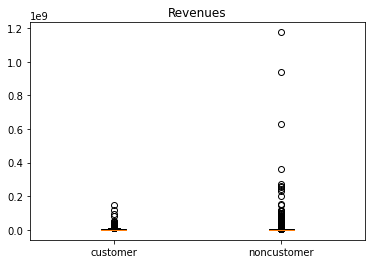

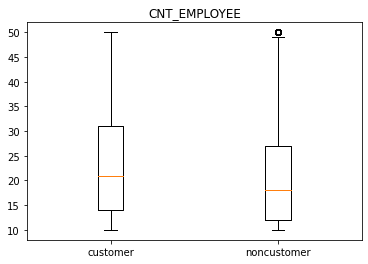

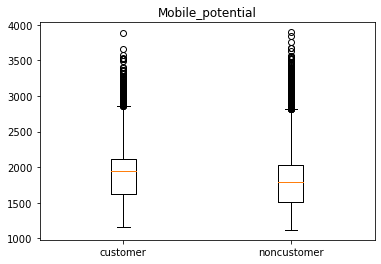

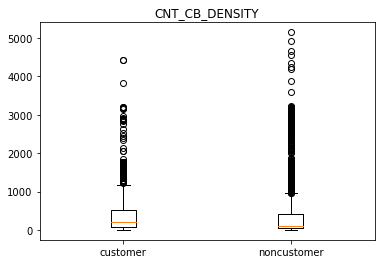

In [29]:
data = [customer_dt['Revenue'], noncustomer_dt ['Revenue']]
fig1, ax1 = pyplot.subplots()
ax1.set_title('Revenues')
ax1.boxplot(data, labels = ["customer", "noncustomer"])
pyplot.show()

data = [customer_dt['CNT_EMPLOYEE'], noncustomer_dt ['CNT_EMPLOYEE']]
fig2, ax2 = pyplot.subplots()
ax2.set_title('CNT_EMPLOYEE')
ax2.boxplot(data, labels = ["customer", "noncustomer"])
pyplot.show()

data = [customer_dt['Mobile_potential'], noncustomer_dt ['Mobile_potential']]
fig3, ax3 = pyplot.subplots()
ax3.set_title('Mobile_potential')
ax3.boxplot(data, labels = ["customer", "noncustomer"])
pyplot.show()

data = [customer_dt['CNT_CB_DENSITY'], noncustomer_dt ['CNT_CB_DENSITY']]
fig4, ax4 = pyplot.subplots()
ax4.set_title('CNT_CB_DENSITY')
ax4.boxplot(data, labels = ["customer", "noncustomer"])
pyplot.show()

As we observe from the boxplots, some of them present outliers. There are several mechanisms to eliminate outliers. One option is to eliminate the values higher than a statistical value for each numerical variable.

[**EX4**] [**CODE**] Remove the values higher than 5* IQR for each variable: `Revenue`, `CNT_EMPLOYEE`, `Mobile_potential`, `CNT_CB_DENSITY`, `CNT_CB_MOB_DENSITY`and `CNT_CB_FN_DENSITY`. Compare with the boxplot of the previous exercise [**EX3**] and explain the differences.

In [30]:
def compute_IQR(column):
  q1, q3 = np.percentile(column, [25, 75])
  return q3 - q1

In [31]:
customer_dt_IQR = customer_dt[(customer_dt['Revenue'] <= 5*compute_IQR(customer_dt["Revenue"])) &
                              (customer_dt['CNT_EMPLOYEE'] <= 5*compute_IQR(customer_dt["CNT_EMPLOYEE"])) &
                              (customer_dt['Mobile_potential'] <= 5*compute_IQR(customer_dt["Mobile_potential"])) &
                              (customer_dt['CNT_CB_DENSITY'] <= 5*compute_IQR(customer_dt["CNT_CB_DENSITY"])) &
                              (customer_dt['CNT_CB_MOB_DENSITY'] <= 5*compute_IQR(customer_dt["CNT_CB_MOB_DENSITY"])) &
                              (customer_dt['CNT_CB_FN_DENSITY'] <= 5*compute_IQR(customer_dt["CNT_CB_FN_DENSITY"]))]

In [32]:
customer_dt_IQR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 11548 to 13321
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                838 non-null    object 
 1   Customer_Flag       838 non-null    int64  
 2   Revenue             838 non-null    float64
 3   Sector              838 non-null    float64
 4   Legal_Form_Code     838 non-null    float64
 5   CNT_EMPLOYEE        838 non-null    int64  
 6   CNT_CB_DENSITY      838 non-null    float64
 7   CNT_CB_MOB_DENSITY  838 non-null    float64
 8   CNT_CB_FN_DENSITY   838 non-null    float64
 9   Mobile_potential    838 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 72.0+ KB


In [33]:
noncustomer_dt_IQR = noncustomer_dt[(noncustomer_dt['Revenue'] <= 5*compute_IQR(noncustomer_dt["Revenue"])) &
                                    (noncustomer_dt['CNT_EMPLOYEE'] <= 5*compute_IQR(noncustomer_dt["CNT_EMPLOYEE"])) &
                                    (noncustomer_dt['Mobile_potential'] <= 5*compute_IQR(noncustomer_dt["Mobile_potential"])) &
                                    (noncustomer_dt['CNT_CB_DENSITY'] <= 5*compute_IQR(noncustomer_dt["CNT_CB_DENSITY"])) &
                                    (noncustomer_dt['CNT_CB_MOB_DENSITY'] <= 5*compute_IQR(noncustomer_dt["CNT_CB_MOB_DENSITY"])) &
                                    (noncustomer_dt['CNT_CB_FN_DENSITY'] <= 5*compute_IQR(noncustomer_dt["CNT_CB_FN_DENSITY"]))]

In [34]:
noncustomer_dt_IQR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4833 entries, 5 to 11546
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                4833 non-null   object 
 1   Customer_Flag       4833 non-null   int64  
 2   Revenue             4833 non-null   float64
 3   Sector              4833 non-null   float64
 4   Legal_Form_Code     4833 non-null   float64
 5   CNT_EMPLOYEE        4833 non-null   int64  
 6   CNT_CB_DENSITY      4833 non-null   float64
 7   CNT_CB_MOB_DENSITY  4833 non-null   float64
 8   CNT_CB_FN_DENSITY   4833 non-null   float64
 9   Mobile_potential    4833 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 415.3+ KB


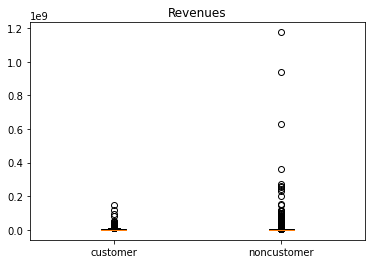

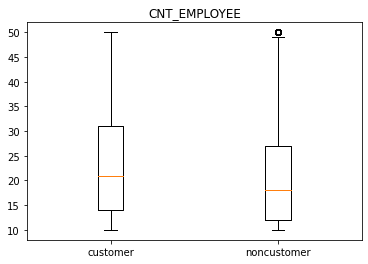

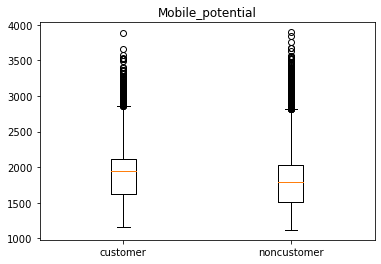

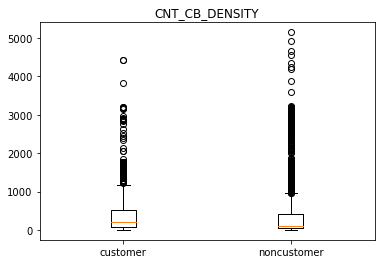

In [35]:
data = [customer_dt['Revenue'], noncustomer_dt ['Revenue']]
fig1, ax1 = pyplot.subplots()
ax1.set_title('Revenues')
ax1.boxplot(data, labels = ["customer", "noncustomer"])
pyplot.show()

data = [customer_dt['CNT_EMPLOYEE'], noncustomer_dt ['CNT_EMPLOYEE']]
fig2, ax2 = pyplot.subplots()
ax2.set_title('CNT_EMPLOYEE')
ax2.boxplot(data, labels = ["customer", "noncustomer"])
pyplot.show()

data = [customer_dt['Mobile_potential'], noncustomer_dt ['Mobile_potential']]
fig3, ax3 = pyplot.subplots()
ax3.set_title('Mobile_potential')
ax3.boxplot(data, labels = ["customer", "noncustomer"])
pyplot.show()

data = [customer_dt['CNT_CB_DENSITY'], noncustomer_dt ['CNT_CB_DENSITY']]
fig4, ax4 = pyplot.subplots()
ax4.set_title('CNT_CB_DENSITY')
ax4.boxplot(data, labels = ["customer", "noncustomer"])
pyplot.show()

On the other hand, before applying any classification algorithm, it is necessary to transform non-numerical variables. The most common transformations are **coding as integer** or **coding as dummies**. Before deciding the mechanism it is important to analyze, for each categorical variable, their number of different values and their frequencies. In case of high number of possible values in comparision with the size of the dataset, **dummy** transformation could generate sparse matrix.

[**EX5**] [**REPORT**] Calculate the ratio of the values of `City` for `customer_dt` and `noncustomer_dt` datasets. Compare the ratio of each category of each dataset.

In [36]:
customer_dt=customer_dt_IQR
noncustomer_dt= noncustomer_dt_IQR

In [37]:
print('Ratio of City values for customers:\n', customer_dt['City'].value_counts(normalize = True))
print('\nRatio of City values for noncustomers:\n', noncustomer_dt['City'].value_counts(normalize = True))

Ratio of City values for customers:
 München         0.025060
Köln            0.020286
Chemnitz        0.019093
Frankfurt       0.014320
Stuttgart       0.013126
                  ...   
Wolfschlugen    0.001193
Teningen        0.001193
Alsdorf         0.001193
Nordkirchen     0.001193
Anger           0.001193
Name: City, Length: 503, dtype: float64

Ratio of City values for noncustomers:
 Köln              0.016139
Stuttgart         0.010139
Bremen            0.010139
Dortmund          0.009518
Frankfurt         0.008897
                    ...   
Völklingen        0.000207
Pöttmes           0.000207
Feldafing         0.000207
Ubstadt-Weiher    0.000207
Wilsum            0.000207
Name: City, Length: 2110, dtype: float64


As the number of distinct values is high, we will apply a **integer** encoding through the LabelEncoder() transformation as follows:

In [38]:
City_Categ=customer_dt['City'].append(noncustomer_dt['City'])

In [39]:
city_encoder=LabelEncoder()
city_encoder.fit(City_Categ.values)
customer_dt['City_coded']=city_encoder.transform(customer_dt['City'].values)
noncustomer_dt['City_coded']=city_encoder.transform(noncustomer_dt['City'].values)

In [40]:
customer_dt.head()

,City,Customer_Flag,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,City_coded
11548,Haar,1,4000000.0,42.0,14.0,13,891.0,867.0,62.0,1778.004205,772
11551,Greding,1,11780000.0,74.0,4.0,50,7.0,7.0,0.0,1899.663564,711
11553,Dörth,1,2050000.0,43.0,14.0,16,30.0,30.0,1.0,1655.520125,434
11554,Frankfurt,1,853500.0,63.0,14.0,13,870.0,842.0,77.0,1548.507315,580
11565,Benningen,1,10680000.0,74.0,4.0,16,319.0,317.0,10.0,1746.128813,202


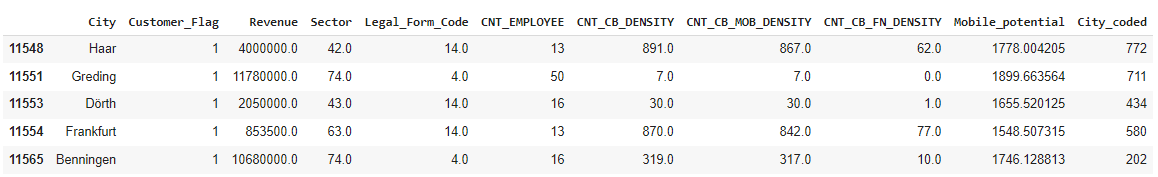

[**EX5**] [**CODE**] Finally before entering in the training stage,  let's create a `final_dataset` that is the result of stacking `customer_dt`and `noncustomer_dt`considering the following variables: `City_coded`, `Revenue`, `Sector`, `Legal_Form_Code`, `CNT_EMPLOYEE`, `CNT_CB_DENSITY`, `CNT_CB_MOB_DENSITY`, `CNT_CB_FN_DENSITY`and `Mobile_potential`. The 'final_dataset' should include a new variable, `Target`, that takes value **0** for noncustomers and **1** for customers registers. The `Target` will distiguish the two classes to train the model.

In [34]:
customer_dt= customer_dt.rename(columns={"Customer_Flag": "Target",})
noncustomer_dt= noncustomer_dt.rename(columns={"Customer_Flag": "Target",})

final_dataset= pd.concat([customer_dt, noncustomer_dt],ignore_index=True)
final_dataset= final_dataset[["City_coded", "Revenue", "Sector", "Legal_Form_Code", "CNT_EMPLOYEE", "CNT_CB_DENSITY", "CNT_CB_MOB_DENSITY", "CNT_CB_FN_DENSITY","Mobile_potential","Target"]]


final_dataset.head()

,City_coded,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,Target
0,772,4000000.0,42.0,14.0,13,891.0,867.0,62.0,1778.004205,1
1,711,11780000.0,74.0,4.0,50,7.0,7.0,0.0,1899.663564,1
2,434,2050000.0,43.0,14.0,16,30.0,30.0,1.0,1655.520125,1
3,580,853500.0,63.0,14.0,13,870.0,842.0,77.0,1548.507315,1
4,202,10680000.0,74.0,4.0,16,319.0,317.0,10.0,1746.128813,1


In [35]:
final_dataset.tail()

,City_coded,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,Target
5666,722,6391606.0,60.0,20.0,19,57.0,57.0,0.0,2006.059998,0
5667,1836,305000.0,60.0,4.0,13,9.0,9.0,0.0,1231.304840,0
5668,584,4200000.0,23.0,14.0,50,62.0,62.0,6.0,1958.236002,0
5669,1882,1336495.0,60.0,16.0,16,63.0,61.0,2.0,1703.188202,0
5670,966,4593054.0,64.0,14.0,41,90.0,90.0,5.0,1985.888315,0


The output should look like this:

In [36]:
final_dataset.head()

,City_coded,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,Target
0,772,4000000.0,42.0,14.0,13,891.0,867.0,62.0,1778.004205,1
1,711,11780000.0,74.0,4.0,50,7.0,7.0,0.0,1899.663564,1
2,434,2050000.0,43.0,14.0,16,30.0,30.0,1.0,1655.520125,1
3,580,853500.0,63.0,14.0,13,870.0,842.0,77.0,1548.507315,1
4,202,10680000.0,74.0,4.0,16,319.0,317.0,10.0,1746.128813,1


In [37]:
final_dataset.tail()

,City_coded,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,Target
5666,722,6391606.0,60.0,20.0,19,57.0,57.0,0.0,2006.059998,0
5667,1836,305000.0,60.0,4.0,13,9.0,9.0,0.0,1231.304840,0
5668,584,4200000.0,23.0,14.0,50,62.0,62.0,6.0,1958.236002,0
5669,1882,1336495.0,60.0,16.0,16,63.0,61.0,2.0,1703.188202,0
5670,966,4593054.0,64.0,14.0,41,90.0,90.0,5.0,1985.888315,0


To measure the quality of our classifiers, it is necessary to train and test the models with different datasets. For this objective we will use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to generate 4 new datasets: 2 for training and 2 for test: 
- `X_train`: contains all variables except `Target` for the 80% of `final_dataset`,
- `y_train`: contains `Target`variables for the 80% of `final_dataset`, 
- `X_test`: contains all variables except `Target` for the 20% of `final_dataset`,
- `y_test`: contains `Target`variables for the 20% of `final_dataset`.

In [38]:
X_train, X_test, y_train, y_test= train_test_split (final_dataset.iloc[:,:-1], final_dataset.iloc[:,-1], test_size=0.2, random_state=42) 
X_train

,City_coded,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential
718,357,1500000.0,19.0,16.0,13,460.0,453.0,18.0,1611.798456
4113,1035,1650000.0,42.0,31.0,17,26.0,25.0,2.0,1832.495822
670,936,1200000.0,38.0,31.0,13,57.0,56.0,1.0,1482.466783
3497,1775,753944.0,60.0,14.0,12,83.0,82.0,2.0,1351.424294
5471,1043,800000.0,38.0,14.0,15,7.0,7.0,0.0,1387.386924
...,...,...,...,...,...,...,...,...,...
3772,675,5000000.0,13.0,14.0,10,427.0,424.0,16.0,1658.185754
5191,604,550000.0,50.0,4.0,20,99.0,95.0,9.0,1580.154346
5226,1045,1450000.0,31.0,18.0,12,21.0,21.0,0.0,1492.190023
5390,636,6128271.0,24.0,14.0,41,17.0,17.0,1.0,2019.100348


[**EX6**] [**REPORT**] Calculate the lenght of `X_train` and `X_test` datasets. Is it aligned with the `test_size`value selected in the split?

In [39]:
print(X_train, "\n\n", X_test)

      City_coded    Revenue  ...  CNT_CB_FN_DENSITY  Mobile_potential
718          357  1500000.0  ...               18.0       1611.798456
4113        1035  1650000.0  ...                2.0       1832.495822
670          936  1200000.0  ...                1.0       1482.466783
3497        1775   753944.0  ...                2.0       1351.424294
5471        1043   800000.0  ...                0.0       1387.386924
...          ...        ...  ...                ...               ...
3772         675  5000000.0  ...               16.0       1658.185754
5191         604   550000.0  ...                9.0       1580.154346
5226        1045  1450000.0  ...                0.0       1492.190023
5390         636  6128271.0  ...                1.0       2019.100348
860         1379  3639224.0  ...               22.0       1969.250897

[4536 rows x 9 columns] 

       City_coded     Revenue  ...  CNT_CB_FN_DENSITY  Mobile_potential
3671        1275    300000.0  ...                0.0       12

[**EX7**] [**REPORT**] Draw the histograms of `y_train`and `y_test`. Is the dataset balanced (similar number of rows for each class or Target) or imbalanced ? How do you think it could affect to quality of the classifier?

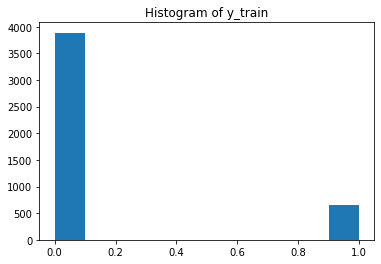

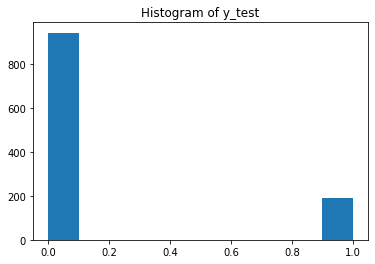

In [40]:
plt.title("Histogram of y_train")
plt.hist(y_train)
plt.show()
plt.title("Histogram of y_test")
plt.hist(y_test)
plt.show()

# 2. Model Training: from baseline models to ensemble¶

Now we are ready to enter in the training stage of the machine learning models. The common way to procedure is starting with baseline models (i.e. SVM, Decision Trees, Naive Bayes, etc....) and later, try to improve it adjusting hyperparameters of the models or creating more complex models architectures as ensembles.

## 2.1. Baseline of models: Training and evaluation

In the following section we are training a SVM, Decision Tree and Naive Bayes algorithms. To do it, we will use the `X_train`and `y_train`datasets.
Later on we will evaluate the performance (i.e. **accuracy**, **confusion matrix**, **recall** and **precision**) of each model with the `test`dataset, i.e. `X_test`and `y_test`.


Tip 1: You may use [classification_report()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) from Sklearn library to calculate the **precision**, **recall** of the model.

Tip 2: You may use [confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) from Sklearn library to calculate the confusion matrix of a model.

Tip 3: When using Sklearn library, you may use the function **.score(X_test, y_test)** to calculate the accuracy value.

### Classification with a SVM model

[**EX8**] [**CODE**] Train the SVM classifier of the Sklearn library. Evaluate the following metrics for kernel="rbf":
- Which is **precision**, **recall** and **accuracy** of the algorithm?
- Which is the **confusion matrix**?
- Is the algorithm classifying both classes (Target=0 and Target=1) in a similar way? Why?
- Compare the **precision** and **recall** of the **training** dataset (i.e.`X_train`and `y_train`) vs the **test** dataset (i.e. `X_test`and `y_test`). Which is better? Why? Which is the correct measure to estimate the performance for other unseen datasets? Why?

In [41]:
y_test.sum()

190

In [42]:
#### --- Support Vector Classification ==> SVC()
model_SVC = SVC(random_state=42) #Create the model based SVC and kernel by defaul is "rbf"
model_SVC.fit(X_train, y_train) #Train the model with the training samples: X_train and y_train
y_pred_SVC=model_SVC.predict(X_test) #Test the trained model with test samples
result_SVC=model_SVC.score(X_test, y_test) #Print the score of the trained model
print("SVC Accuracy:", result_SVC)

print(classification_report(y_test,y_pred_SVC))

confusion_matrix(y_test, y_pred_SVC) #The inputs are the test dataset and the predicted from the classifier. 

SVC Accuracy: 0.8334801762114538
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       945
           1       1.00      0.01      0.01       190

    accuracy                           0.83      1135
   macro avg       0.92      0.50      0.46      1135
weighted avg       0.86      0.83      0.76      1135



array([[945,   0],
       [189,   1]])

In [43]:
#evaluating performance on train set
y_pred_SVC_train=model_SVC.predict(X_train) 
result_SVC=model_SVC.score(X_train, y_train) 
print("SVC Accuracy:", result_SVC)

print(classification_report(y_train,y_pred_SVC_train))

confusion_matrix(y_train, y_pred_SVC_train) 

SVC Accuracy: 0.8589065255731922
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      3888
           1       1.00      0.01      0.02       648

    accuracy                           0.86      4536
   macro avg       0.93      0.51      0.47      4536
weighted avg       0.88      0.86      0.80      4536



array([[3888,    0],
       [ 640,    8]])

### Classification with a Decision Tree model

[**EX9**] [**CODE**] Train the Decision Tree algorithm from Sklearn library. Evaluate the following metrics:
- Which is **precision**, **recall** and **accuracy** of the algorithm?
- Which is the **confusion matrix**?
- Is Decision Tree algorithm working better than SVM? Why?

In [44]:
#### --- Decission Tree Classifier ==> DecisionTreeClassifier()
model_DT = DecisionTreeClassifier( random_state=42)
model_DT.fit(X_train, y_train)
y_pred_DT=model_DT.predict(X_test)
result_DT=model_DT.score(X_test, y_test)
print("DT Accuracy:", result_DT)

print(classification_report(y_test,y_pred_DT))

confusion_matrix(y_test, y_pred_DT) #The inputs are the test dataset and the predicted from the classifier. 

DT Accuracy: 0.7691629955947137
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       945
           1       0.31      0.32      0.32       190

    accuracy                           0.77      1135
   macro avg       0.59      0.59      0.59      1135
weighted avg       0.77      0.77      0.77      1135



array([[812, 133],
       [129,  61]])

### Comparing algorithm consistenly: KFold cross-validation

When we are looking for the best algorithm to classify a dataset, it is very useful to compare all of them. Besides, to protect the training from **overfitting** and calculate the performance with less variance than a single train-test split, it is uselful to apply **K-Fold cross-validation**. The way that KFolds works is splitting the dataset into k-parts or **fold** (e.g. k = 3, 5 or k = 10). The algorithm is trained on k − 1 folds with one held back and tested on the held back fold.

[**EX10**] [**CODE**] Train a SVM and Decision Tree algorithms using a KFold cross-validation with **k=5** and calculate the **mean** and **standard deviation** of the **accuracy**. Plot a boxplot of the accuracy for every model. Which is the model with better mean value of the accuracy? Which is the algorithm with less deviation on the accuracy?  

Tip 1: You may use [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) to apply cross-validation.

In [45]:
#Models definition
models=[]
models.append(('SVM', SVC()))
models.append(('Decision_trees', DecisionTreeClassifier(random_state=42)))

#Evaluate each models
results=[]
names=[]
scoring_metric='accuracy'
for name_model, model in models:
    kfold= KFold(n_splits=5)
    cv_results=cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring_metric)
    results.append(cv_results)
    names.append(name_model)
    print ("Model", name_model, "with accuracy (mean):", cv_results.mean(), "and accuracy (std):", cv_results.std())

Model SVM with accuracy (mean): 0.858910869449072 and accuracy (std): 0.012553735955727617
Model Decision_trees with accuracy (mean): 0.7804248891392935 and accuracy (std): 0.008844450284087176


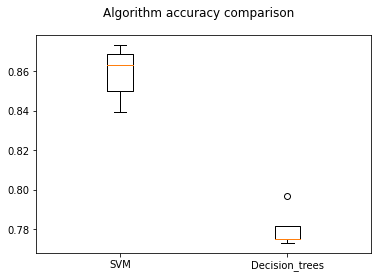

In [46]:
fig=pyplot.figure()
fig.suptitle ("Algorithm accuracy comparison")
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

The output of the boxplots should look like this:

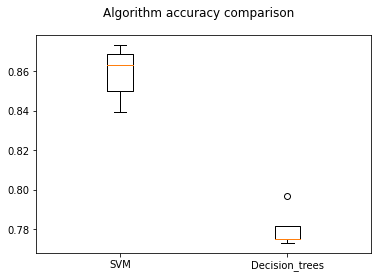

In [47]:
#boxplot for algorithm comparison
fig=pyplot.figure()
fig.suptitle ("Algorithm accuracy comparison")
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## 2.2 Improving the model

As we observe from the baseline models, even though the accuracy is over 70% the classifiers don't distinguish properly both classes, i.e. **Target=1** and **Target=0**.  
In this scenario, we should apply another strategies to improve the perfomance. There are several options: from adjusting the balance of the classes or doing the fine tuning of the hyperparameters of the models (for instance the type of kernel in SVM or the minimum number of samples per leaf in Decision Tree) to combine differents models to create ensembles.
In this section, we will evaluate our classifiers in two ways:
- Forcing the balancing of both classes
- Building ensembles of models

### Balancing the dataset

Let's check the type of balancing we have in our training and test datasets.

[**EX11**][**CODE**] Split the previous `final_dataset`in two datasets: `customer_dt` for class 1 and `noncustomer_dt`for class 0. Calculate the number of samples for the **customers** class (i.e. Target=1) and for the **noncustomers** class (i.e. Target=0). Is the `final_dataset`balanced or imbalanced? Explain two options to match both datasets.


Let's undersample the `noncustomer_dt` to balance both datasets:

In [48]:
noncustomer_dt_sample=noncustomer_dt.sample(840,random_state=42)
print("The new number of samples in noncustomer dataset is:", len(noncustomer_dt_sample))

The new number of samples in noncustomer dataset is: 840


If we append both datasets, the **customer_dt** and the **noncustomer_dt_sample**, the new `final_dataset`looks like:

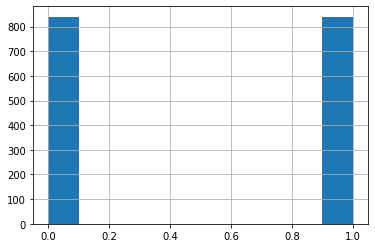

In [49]:
final_dataset=customer_dt.append(noncustomer_dt_sample).reset_index().drop('index', axis=1)
final_dataset=final_dataset.loc[:,['City_coded', 'Revenue', 'Sector', 'Legal_Form_Code', 'CNT_EMPLOYEE', 'CNT_CB_DENSITY',
                            'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY', 'Mobile_potential','Target']]
final_dataset.Target.hist()

[**EX12**][**CODE**][**REPORT**] Train a SVC and Decision Tree algorithm with the new `final_dataset`. Evaluate the **recall**, **precision** and **confusion matrix** of all 3 models.
- Which has better accuracy?
- Which is the model with better recall? And accuracy?
- Which model you recommend to classify both classes? Justify your answer

In [50]:
X_train, X_test, y_train, y_test= train_test_split (final_dataset.iloc[:,:-1], final_dataset.iloc[:,-1], test_size=0.33, random_state=42) 


#### --- Support Vector Classification ==> SVC()
model_SVC = SVC(random_state=42) #Create the model based SVC and kernel by defaul is "rbf"
model_SVC.fit(X_train, y_train) #Train the model with the training samples: X_train and y_train
y_pred_SVC=model_SVC.predict(X_test) #Test the trained model with test samples
result_SVC=model_SVC.score(X_test, y_test) #Print the score of the trained model
print("SVC Accuracy:", result_SVC)

print(classification_report(y_test,y_pred_SVC))

print(confusion_matrix(y_test, y_pred_SVC)) #The inputs are the test dataset and the predicted from the classifier. 

print("\n")


#### --- Decission Tree Classifier ==> DecisionTreeClassifier()
model_DT = DecisionTreeClassifier( random_state=42)
model_DT.fit(X_train, y_train)
y_pred_DT=model_DT.predict(X_test)
result_DT=model_DT.score(X_test, y_test)
print("DT Accuracy:", result_DT)

print(classification_report(y_test,y_pred_DT))

confusion_matrix(y_test, y_pred_DT) #The inputs are the test dataset and the predicted from the classifier. 

SVC Accuracy: 0.5216606498194946
              precision    recall  f1-score   support

           0       0.52      0.70      0.60       281
           1       0.52      0.34      0.41       273

    accuracy                           0.52       554
   macro avg       0.52      0.52      0.50       554
weighted avg       0.52      0.52      0.51       554

[[196  85]
 [180  93]]


DT Accuracy: 0.592057761732852
              precision    recall  f1-score   support

           0       0.61      0.54      0.57       281
           1       0.58      0.65      0.61       273

    accuracy                           0.59       554
   macro avg       0.59      0.59      0.59       554
weighted avg       0.59      0.59      0.59       554



array([[151, 130],
       [ 96, 177]])

### Ensembling models

Another mechanism to improve the performance of a classifier is to combine several algorithms. The three most popular methods for combining models are:
- Bagging combines multiple models that are trained with different subsamples of the training dataset.
- Boosting combines multiple models in cascade and each of them learns to fix the prediction errors of the prior model.
- Voting combines statistically the output of several models.

Usually Bagging and Boosting are formed by models of the same type meanwhile voting could be formed by different models.

### Voting ensemble

[**EX13**][**CODE**][**REPORT**] Build a **voting** ensemble formed by a SVM and Decision Tree and train it with the balanced training dataset. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [VotingClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) to build this type of ensemble.

In [51]:
dataset = customer_dt.append(noncustomer_dt_sample).reset_index().drop('index', axis = 1)
dataset = dataset.loc[:,['City_coded', 'Revenue', 'Sector', 'Legal_Form_Code', 'CNT_EMPLOYEE', 'CNT_CB_DENSITY', 'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY', 'Mobile_potential', 'Target']]
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:,:-1], final_dataset.iloc[:,-1], test_size = 0.2, random_state = 42)

#### --- VotingClassifier
clf1 = SVC()
clf2 = DecisionTreeClassifier( random_state=42)
model_Voting = VotingClassifier(estimators=[('SVC',clf1), ('DecisionTree', clf2)], voting='hard')
model_Voting.fit(X_train, y_train) #Train the model with the training samples: X_train and y_train
y_pred_Voting=model_Voting.predict(X_test) #Test the trained model with test samples
result_Voting=model_Voting.score(X_test, y_test) #Print the score of the trained model
print("Voting Accuracy:", result_Voting)

print(classification_report(y_test,y_pred_Voting))

print(confusion_matrix(y_test, y_pred_Voting)) #The inputs are the test dataset and the predicted from the classifier. 


Voting Accuracy: 0.5089285714285714
              precision    recall  f1-score   support

           0       0.50      0.82      0.62       165
           1       0.55      0.21      0.30       171

    accuracy                           0.51       336
   macro avg       0.52      0.51      0.46       336
weighted avg       0.52      0.51      0.46       336

[[135  30]
 [135  36]]


### Bagging ensemble: Random Forest

[**EX14**][**CODE**][**REPORT**] Build a **Bagging** ensemble based on Random Forest. Random Forest is considered a bagging ensemble formed by Decision Trees algorithms. Train the Random Forest with the balanced training dataset, i.e. `X_train` and `y_train`. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to build this type of ensemble.

In [52]:
dataset = customer_dt.append(noncustomer_dt_sample).reset_index().drop('index', axis = 1)
dataset = dataset.loc[:,['City_coded', 'Revenue', 'Sector', 'Legal_Form_Code', 'CNT_EMPLOYEE', 'CNT_CB_DENSITY', 'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY', 'Mobile_potential', 'Target']]
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:,:-1], final_dataset.iloc[:,-1], test_size = 0.2, random_state = 42)


#### --- RandomForest
model_Forest = RandomForestClassifier(random_state=42)#default_parameters
model_Forest.fit(X_train, y_train) #Train the model with the training samples: X_train and y_train
y_pred_Forest=model_Forest.predict(X_test) #Test the trained model with test samples
result_Forest=model_Forest.score(X_test, y_test) #Print the score of the trained model
print("Forest Accuracy:", result_Forest)

print(classification_report(y_test,y_pred_Forest))

print(confusion_matrix(y_test, y_pred_Forest)) #The inputs are the test dataset and the predicted from the classifier. 

Forest Accuracy: 0.6160714285714286
              precision    recall  f1-score   support

           0       0.62      0.58      0.60       165
           1       0.62      0.65      0.63       171

    accuracy                           0.62       336
   macro avg       0.62      0.62      0.62       336
weighted avg       0.62      0.62      0.62       336

[[ 96  69]
 [ 60 111]]


[**EX15**][**REPORT**] Plot the histograms of the probabilities resulting of the prediction of the Random Forest model for class 0 and class 1.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


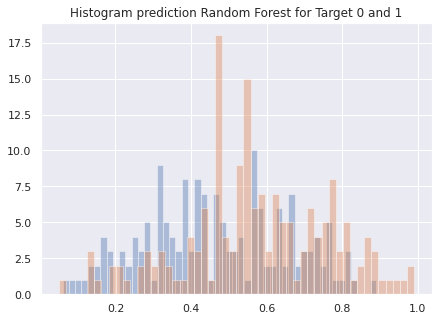

In [53]:
y_pred_p = model_Forest.predict_proba(X_test)
y_pred = np.concatenate((y_pred_p[:,1].reshape(-1,1), np.asarray(y_test).reshape(-1,1)), axis = 1)
y_test_1 = y_pred[y_pred[:,1] == 1]
y_test_0 = y_pred[y_pred[:,1] == 0]


sns.set(rc={'figure.figsize':(7,5)})
sns.distplot(y_test_0[:,0], kde = False, bins = 50)
sns.distplot(y_test_1[:,0], kde = False, bins = 50)
plt.title("Histogram prediction Random Forest for Target 0 and 1")
plt.show()



### Boosting ensemble: Gradient Tree Boosting

[**EX16**][**CODE**][**REPORT**] Build a **Boosting** ensemble based on Gradient Tree Boosting (GBT). There are several boosting algorithms as Adaboost, etc.  Train the GBT with the balanced training dataset, i.e. `X_train` and `y_train`. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to build this type of ensemble.

In [54]:
dataset = customer_dt.append(noncustomer_dt_sample).reset_index().drop('index', axis = 1)
dataset = dataset.loc[:,['City_coded', 'Revenue', 'Sector', 'Legal_Form_Code', 'CNT_EMPLOYEE', 'CNT_CB_DENSITY', 'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY', 'Mobile_potential', 'Target']]
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:,:-1], final_dataset.iloc[:,-1], test_size = 0.2, random_state = 42)

#### --- Boosting
model_GBT =GradientBoostingClassifier(random_state = 42 )#default_parameters
model_GBT.fit(X_train, y_train) #Train the model with the training samples: X_train and y_train
y_pred_GBT=model_GBT.predict(X_test) #Test the trained model with test samples
result_GBT=model_GBT.score(X_test, y_test) #Print the score of the trained model
print("Boosting Accuracy:", result_GBT)

print(classification_report(y_test,y_pred_GBT))

print(confusion_matrix(y_test, y_pred_GBT)) #The inputs are the test dataset and the predicted from the classifier. 

Boosting Accuracy: 0.6071428571428571
              precision    recall  f1-score   support

           0       0.62      0.52      0.57       165
           1       0.60      0.69      0.64       171

    accuracy                           0.61       336
   macro avg       0.61      0.61      0.60       336
weighted avg       0.61      0.61      0.60       336

[[ 86  79]
 [ 53 118]]


[**EX17**][**REPORT**] Plot the histograms of the probabilities resulting of the prediction of the GBT model for class 0 and class 1. Compare it with histogram of Random Forest. Which one classifies better from your point of view? Why? 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


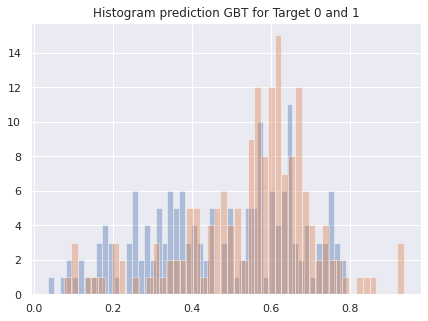

In [63]:
y_pred_p = model_GBT.predict_proba(X_test)
y_pred = np.concatenate((y_pred_p[:,1].reshape(-1,1), np.asarray(y_test).reshape(-1,1)), axis = 1)
y_test_1 = y_pred[y_pred[:,1] == 1]
y_test_0 = y_pred[y_pred[:,1] == 0]

sns.set(rc={'figure.figsize':(7,5)})
sns.distplot(y_test_0[:,0], kde = False, bins = 50)
sns.distplot(y_test_1[:,0], kde = False, bins = 50)
plt.title("Histogram prediction GBT for Target 0 and 1")
plt.show()


# 3. Creating a Business opportunity with Machine Learning

The cut-off is the **threshold of the probability of the prediction** to assign to class 0 or class 1 the prediction. If probability > cut-off, the model classifies as 1; otherwise, model classifies as 0. 
The cut-off is a value that can be adjusted to increase the recall or the precision. Usually, there is a **trade-off** between improving the recall-precision.

[**EX18**][**CODE**][**REPORT**] Execute the prediction for the selected model. Adjust the cutoff value to optimize the classifier if you consider necessary. How many **non customers** are you going to send to the sales managers to sell our products to them?




In [61]:
#Select GBT

for prob in np.arange (0.4,1,0.1):
    y_pred_new_threshold = (model_GBT.predict_proba(X_test)[:,1]>=prob).astype(int)
    print("Threshold= ", prob)
    print(classification_report(y_test,  y_pred_new_threshold))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_new_threshold))
    sum=0
    numeric_pred=1*(y_pred_new_threshold==1)
    for i in range(len(numeric_pred)):
      sum+=numeric_pred[i]


    print(sum)
    print("\n")



Threshold=  0.4
              precision    recall  f1-score   support

           0       0.70      0.39      0.50       165
           1       0.59      0.84      0.69       171

    accuracy                           0.62       336
   macro avg       0.64      0.62      0.60       336
weighted avg       0.64      0.62      0.60       336

Confusion matrix:
 [[ 65 100]
 [ 28 143]]
243


Threshold=  0.5
              precision    recall  f1-score   support

           0       0.62      0.52      0.57       165
           1       0.60      0.69      0.64       171

    accuracy                           0.61       336
   macro avg       0.61      0.61      0.60       336
weighted avg       0.61      0.61      0.60       336

Confusion matrix:
 [[ 86  79]
 [ 53 118]]
197


Threshold=  0.6
              precision    recall  f1-score   support

           0       0.54      0.68      0.60       165
           1       0.58      0.43      0.49       171

    accuracy                          

Usually, Marketing department needs to know and understand the main features of the algorithms. The code below returns the importance of each feature of the `training_dataset`.

In [60]:
features=['City_coded','Revenue', 'Sector', 'Legal_Form_Code', 'CNT_EMPLOYEE', 'CNT_CB_DENSITY',
                            'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENS', 'Mobile_potential']
features_values=model_GBT.feature_importances_
features_importance=[]
for i in range (len(features)):
    features_importance.append([features[i],features_values[i]])
    

[**EX19**][**CODE**][**REPORT**] Order the features by importance. Which are the top 3 features to discriminate between **non customers** and **customers**?

In [59]:
sort=(sorted(features_importance,key=lambda x:x[1], reverse=True))
sort

[['CNT_CB_MOB_DENSITY', 0.16428493058407861],
 ['Mobile_potential', 0.15750413160906607],
 ['City_coded', 0.12539911204539195],
 ['Revenue', 0.12213803777806513],
 ['Sector', 0.10406687434572721],
 ['Legal_Form_Code', 0.09867929921581355],
 ['CNT_CB_FN_DENS', 0.09239602589476471],
 ['CNT_CB_DENSITY', 0.09110476559511088],
 ['CNT_EMPLOYEE', 0.04442682293198184]]

 [**EX20**][**REPORT**] In this project, we have used classification techniques to identify potential customers. We have adjusted the main classification parameters as cutoff, recall and precision according to the final purpose: in out case, identify **non customers** that could be interested to buy our products. Consider a new campaign focused on accelerating the sales of an **existing mobile tariff** to our customers. Answer the following questions:
- In this case, which is the **target** variable? Which are **target=0** samples? And **target=1**?
- As the marketing campaing is oriented to our customers we will have further information about them in our internal systems. In particular, we could add to the information of the previous section 3 new variables: data and voice consumption and mobile expense. Adding more data to the dataset may imply more computational data and cost. Would you add these 3 new variables to dataset? Justify your answer.
- Today the mobile tariff is not very popular among our customers. Will the training dataset be balanced or unbalanced? Justify your answer.

Imagine the following scatter plot (`monthly data traffic` vs `monthly voice traffic`):


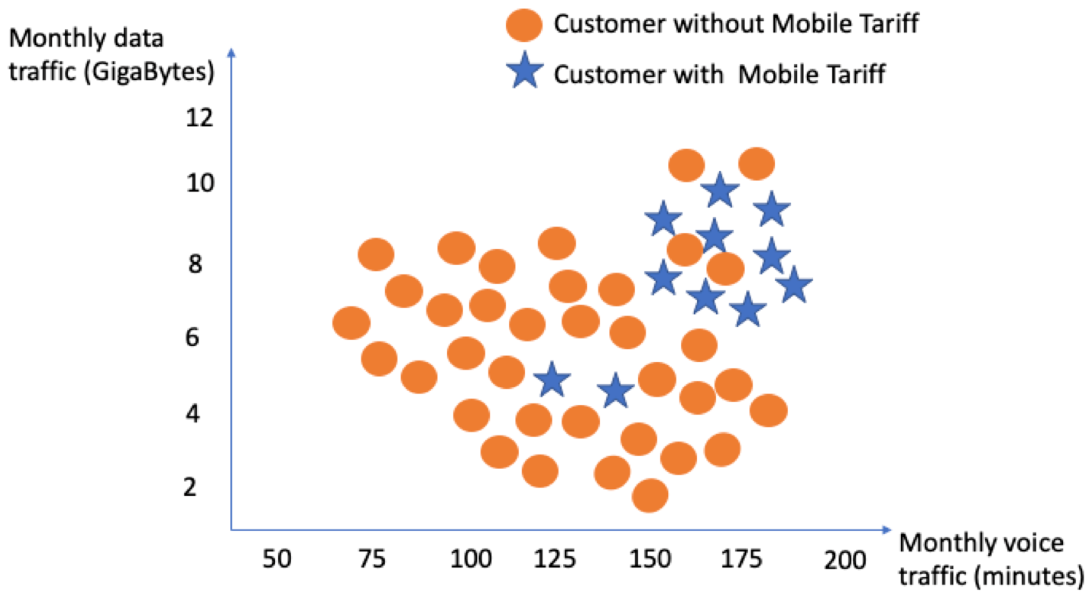


- Describe in terms of `monthly data traffic` and `monthly voice traffic` the **pattern** of target 1 customers
- Draw a plane to separate both classes
- According to the previous plane, which are the customers to be phoned to sell the mobile tariff?
- Could you estimate the **precision** and **recall** of the classification?

*******